In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
MalwareData = pd.read_csv('./Obfuscated-MalMem2022.csv')
MalwareData

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware


In [3]:
MalwareData.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [4]:
print(MalwareData.columns)

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

In [5]:
print(MalwareData.dtypes)

Category                                   object
pslist.nproc                                int64
pslist.nppid                                int64
pslist.avg_threads                        float64
pslist.nprocs64bit                          int64
pslist.avg_handlers                       float64
dlllist.ndlls                               int64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                            int64
handles.avg_handles_per_proc              float64
handles.nport                               int64
handles.nfile                               int64
handles.nevent                              int64
handles.ndesktop                            int64
handles.nkey                                int64
handles.nthread                             int64
handles.ndirectory                          int64
handles.nsemaphore                          int64
handles.ntimer                              int64
handles.nsection                            int64


In [6]:
print(MalwareData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [7]:
print(MalwareData.isna().sum())

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [8]:
int_columns=MalwareData.select_dtypes(include='int')
float_columns=MalwareData.select_dtypes(include='float')
cat_columns=MalwareData.select_dtypes(include='object')

In [9]:
print(int_columns.columns)

Index(['pslist.nproc', 'pslist.nppid', 'pslist.nprocs64bit', 'dlllist.ndlls',
       'handles.nhandles', 'handles.nport', 'handles.nfile', 'handles.nevent',
       'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection',
       'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool',
       'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list',
       'psxview.not_in_csrss_handles', 'psxview.not_in_session',
       'psxview.not_in_deskthrd', 'modules.nmodules', 'svcscan.nservices',
       'svcscan.kernel_drivers', 'svcscan.fs_drivers',
       'svcscan.process_services', 'svcscan.shared_process_services',
       'svcscan.interactive_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.n

In [10]:
print(float_columns.columns)

Index(['pslist.avg_threads', 'pslist.avg_handlers',
       'dlllist.avg_dlls_per_proc', 'handles.avg_handles_per_proc',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.uniqueInjections',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eprocess_pool_false_avg',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pspcid_list_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg',
       'psxview.not_in_deskthrd_false_avg'],
      dtype='object')


In [11]:
print(cat_columns.nunique())

Category    28346
Class           2
dtype: int64


/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


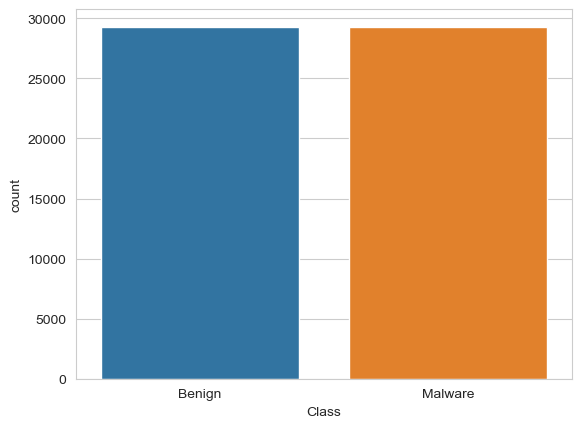

In [12]:
lab=LabelEncoder()
MalwareData['category']=lab.fit_transform(MalwareData['Category'])
MalwareData['class']=lab.fit_transform(MalwareData['Class'])
sns.countplot(MalwareData['Class'])
plt.show()

In [13]:
x=MalwareData[['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
        'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
        'dlllist.avg_dlls_per_proc', 'handles.nhandles',
        'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
        'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
        'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
        'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
        'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
        'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
        'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
        'malfind.commitCharge', 'malfind.protection',
        'malfind.uniqueInjections', 'psxview.not_in_pslist',
        'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
        'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
        'psxview.not_in_session', 'psxview.not_in_deskthrd',
        'psxview.not_in_pslist_false_avg',
        'psxview.not_in_eprocess_pool_false_avg',
        'psxview.not_in_ethread_pool_false_avg',
        'psxview.not_in_pspcid_list_false_avg',
        'psxview.not_in_csrss_handles_false_avg',
        'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg',
        'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
        'svcscan.fs_drivers', 'svcscan.process_services',
        'svcscan.shared_process_services',
        'svcscan.interactive_process_services', 'svcscan.nactive',
        'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric']]

In [14]:
y=MalwareData[['class']]
print(y)

       class
0          0
1          0
2          0
3          0
4          0
...      ...
58591      1
58592      1
58593      1
58594      1
58595      1

[58596 rows x 1 columns]


In [ ]:
import keras.activations, keras.metrics, keras.losses
from keras.models import Sequential
from keras.layers import Dense

x_train,x_test,y_train,y_test=train_test_split(x,y)